In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

/Users/btb/.virtualenvs/prml/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Data

In [2]:
y_ = [198, 193]
n_ = [19934, 19942]

## Model specification
A parameterization for the priors on alpha and beta is

a=μη and b=(1−μ)η

μ = y / n = (198 + 192 / 19934 + 19942)

n* = (19934 + 199942) / 2

μ = Beta(1,1)

η = Logistic(log(n), 1)

p ~ Beta(a, b)

Y ~ Binomial(n, p)

λ = η / (n* + η)


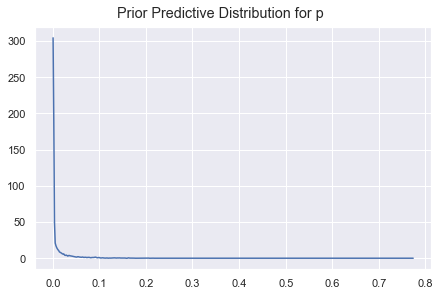

In [3]:
with pm.Model() as model:
    # Hyper-priors # n_star=1, alpha=1, beta=9 are good
    # 10, 1, 9 with 1/2 is good
    # 20000, 2, 98 with 1/5 is good
    # 20000, 2, 2, with 1/5 is good
    # 1000, 2, 2 with 1/4 is good
    n_star = 10
    mu = pm.Beta("mu", alpha=2, beta=98)
    log_nu = pm.Logistic("log_nu", pm.math.log(n_star), 1/2)
    nu = pm.math.exp(log_nu)

    alpha = pm.Deterministic("alpha", mu*nu)    
    beta = pm.Deterministic("beta", (1-mu)*nu)

    # Shrinkage
    lamb = pm.Deterministic("lamb", nu / (n_star + nu))

    # Priors
    p = pm.Beta("p", alpha=alpha, beta=beta, shape=2)

    # Calculations of interest
    pdiff = pm.Deterministic("pdiff", p[0] - p[1])
    RR = pm.Deterministic("RR", p[0]/p[1])

    Y = pm.Binomial("Y", n=n_, p=p, observed=y_)

    prior_checks = pm.sample_prior_predictive(samples=2000)
    pm.plot_dist(prior_checks["p"])
    plt.suptitle("Prior Predictive Distribution for p")


## Posterior sampling

/var/folders/j1/pk1lddxj0d73lw8z0g6dpfph0000gn/T/ipykernel_2701/2924858652.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p, log_nu, mu]
/Users/btb/.virtualenvs/prml/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/btb/.virtualenvs/prml/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.war

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 78 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


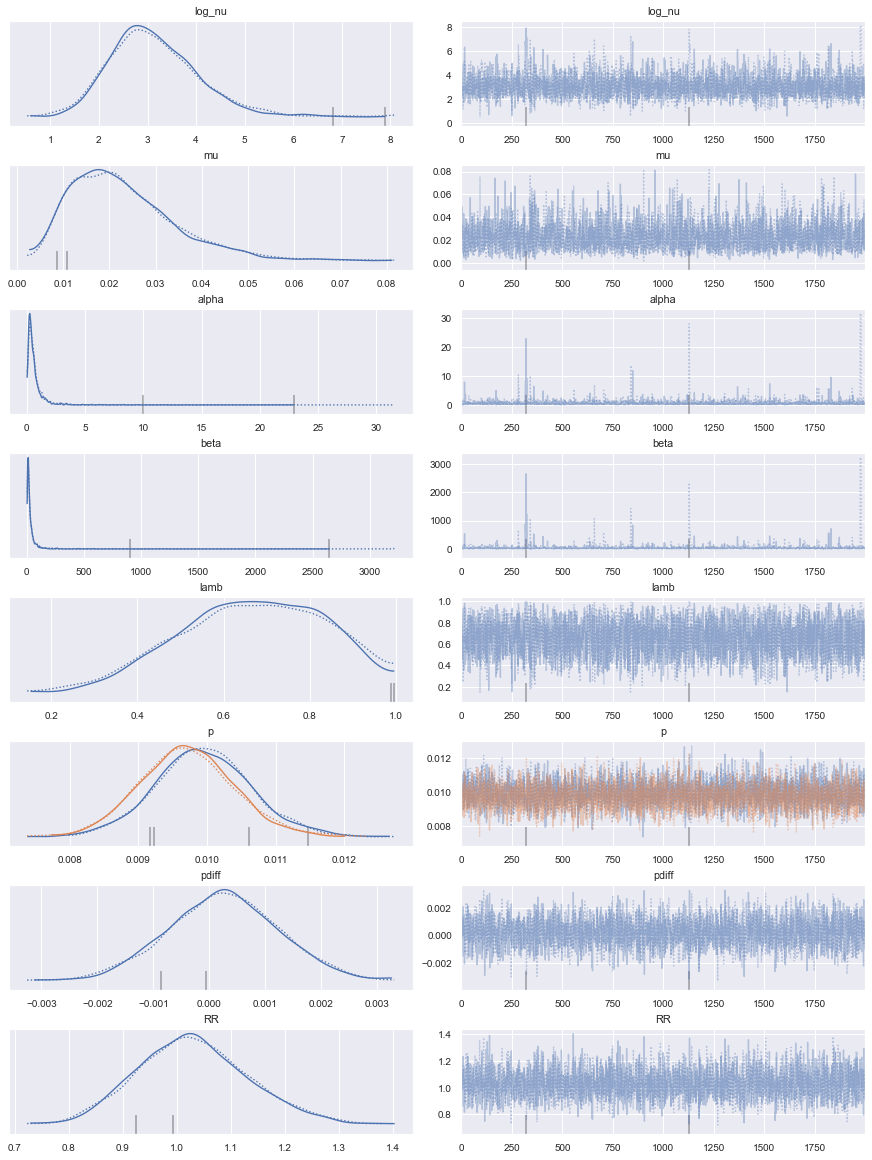

In [4]:
with model:
    trace = pm.sample(2000, target_accept=0.9)
    pm.plot_trace(trace)

## Forest Plots for Parameters of Interest

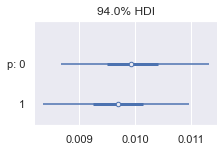

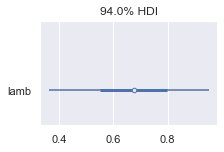

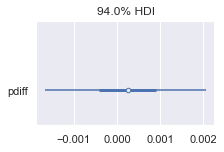

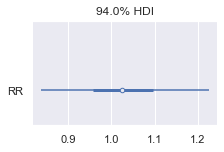

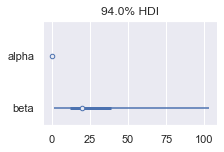

In [5]:
with model:
    pm.plot_forest(trace, var_names=["p"], combined=True, figsize=(3,2))
    pm.plot_forest(trace, var_names=["lamb"], combined=True, figsize=(3,2))
    pm.plot_forest(trace, var_names=["pdiff"], combined=True, figsize=(3,2))
    pm.plot_forest(trace, var_names=["RR"], combined=True, figsize=(3,2))
    pm.plot_forest(trace, var_names=["alpha","beta"], combined=True, figsize=(3,2))